Кластеризация — это задача группировки объектов в кластеры, где объекты в
одном кластере схожи между собой. В отличие от классификации, где данные имеют
заранее известные метки, в кластеризации модель не знает заранее, к каким группам
относятся данные, и должна сама определить, как их сгруппировать. Это одна из задач
обучения без учителя.

Примеры задач кластеризации:

1. Группировка покупателей интернет-магазина — можно группировать покупателей по
схожим предпочтениям и поведению, чтобы предложить персонализированные
рекомендации.
2. Сегментация рынка — разделение пользователей по демографическим характеристикам
и покупательским привычкам.
3. Разделение изображений на категории — например, кластеризация фотографий, где
модель автоматически определяет, какие из них относятся к одинаковой категории, такой
как пейзаж, портрет, природа и т. д.

Как работает кластеризация

Основной задачей кластеризации является нахождение таких групп (кластеров),
которые имеют внутреннее сходство, но при этом сильно отличаются от других групп.
Алгоритм пытается минимизировать различия между объектами в одном кластере и
максимизировать различия между кластерами.

Пример на Python: K-means кластеризация

Алгоритм K-средних (K-means) является одним из самых популярных методов
кластеризации. Он работает следующим образом: модель пытается разделить данные на
несколько кластеров (K), минимизируя внутрикластерные различия.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


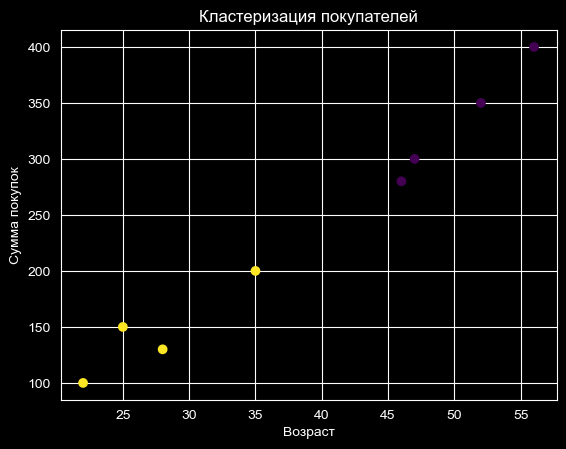

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Пример данных о покупателях
data = {
"Возраст": [22, 25, 47, 52, 46, 56, 28, 35],
"Покупки": [100, 150, 300, 350, 280, 400, 130, 200]
}
df = pd.DataFrame(data)
# Применяем алгоритм K-средних для кластеризации
kmeans = KMeans(n_clusters=2, random_state=42)
df["Кластер"] = kmeans.fit_predict(df[["Возраст", "Покупки"]])
# Визуализация кластеров
plt.scatter(df["Возраст"], df["Покупки"], c=df["Кластер"], cmap="viridis")
plt.xlabel("Возраст")
plt.ylabel("Сумма покупок")
plt.title("Кластеризация покупателей")
plt.show()

Разбор примера:
- Мы создаём набор данных с информацией о возрасте покупателей и их суммах покупок.
- Затем применяем алгоритм K-средних для кластеризации данных на два кластера.
- Визуализируем результаты с помощью графика, где каждый кластер будет отображён
разным цветом.

Итог:
- Кластеризация помогает находить группы схожих объектов без предварительных меток,
что полезно в задачах анализа данных и сегментации.

Метод K-средних

Метод K-средних – один из самых популярных алгоритмов кластеризации, который
помогает автоматически группировать данные в несколько кластеров на основе их
схожести. Он широко применяется в анализе клиентов, сегментации изображений,
биологии и многих других областях, где требуется найти скрытые группы в данных.

Интуиция метода

Представьте, что у вас есть множество точек на плоскости, и вы хотите разделить
их на группы так, чтобы элементы внутри каждой группы были как можно более похожи
между собой. Например, в магазине можно разделить покупателей на несколько типов по
их покупательскому поведению. Метод K-средних делает это, размещая в данных
несколько центров кластеров, а затем постепенно уточняя их положение, чтобы каждая
группа формировалась вокруг своего центра.

Как это работает

Метод K-средних начинается с выбора K случайных точек из набора данных,
которые временно считаются центрами кластеров. Эти центры играют ключевую роль в
процессе кластеризации, так как вокруг них формируются группы объектов. Поскольку
начальный выбор точек влияет на итоговый результат, в современных реализациях
применяются специальные методы инициализации, например, K-means++, который
выбирает стартовые центры более осмысленно, уменьшая вероятность плохой сходимости
алгоритма.

После выбора центров начинается этап распределения объектов по кластерам.
Каждый объект в данных оценивается по степени близости к каждому из текущих центров,
и объект присваивается тому кластеру, чей центр находится ближе всего. Для измерения
расстояния между точкой и центром обычно используется евклидова метрика, которая
определяет ближайший центр по прямой линии. Этот шаг можно представить как процесс
"притяжения" точек к ближайшему кластеру, подобно тому, как гравитация притягивает
объекты к массивным телам.

После первоначального распределения точек центры кластеров пересчитываются:
для каждого кластера вычисляется новое среднее значение координат всех входящих в
него точек, и этот средний вектор становится новым центром кластера. Таким образом,
центры начинают двигаться, стремясь занять более оптимальное положение относительно
объектов. После пересчёта центров происходит повторное распределение точек:
некоторые из них могут сменить кластер, если новый центр оказался ближе, чем
предыдущий.
Этот процесс — перерасчёт центров и переназначение точек — продолжается
итеративно. С каждой итерацией положение центров кластеров стабилизируется, и
количество изменений в распределении точек уменьшается. Алгоритм останавливается,
когда центры перестают двигаться или когда число итераций достигает заданного
максимума. Итоговый результат — разбиение данных на K групп, где каждый объект
принадлежит тому кластеру, в который он наиболее естественно вписывается.
Важно отметить, что метод K-средних чувствителен к выбору числа кластеров K.
Если выбрать слишком маленькое значение, разнородные группы могут быть объединены
в один кластер, а если K слишком велико, данные будут разбиты на искусственные
подгруппы. Чтобы определить оптимальное количество кластеров, часто используют
методы оценки, например, метод локтя, который анализирует, при каком K суммарное
внутрикластерное расстояние перестаёт заметно уменьшаться.

Пример кластеризации

Допустим, у нас есть данные о посетителях интернет-магазина, и мы хотим
разделить их на группы по поведению. Мы можем взять информацию о среднем чеке и
частоте покупок. Если построить график, где одна ось – это сумма покупок, а другая –
количество посещений, точки будут распределены хаотично.
Метод K-средних поможет выделить несколько групп:
1. Покупатели, которые редко заходят, но совершают крупные покупки.
2. Те, кто заходит часто, но тратит небольшие суммы.
3. Среднестатистические пользователи, которые ведут себя умеренно.
4.
После работы алгоритма каждому посетителю будет назначена группа, что позволит
лучше адаптировать маркетинговые стратегии. Например, для первой группы можно
предложить персональные скидки, чтобы увеличить частоту их визитов, а для второй –
рекомендовать более дорогие товары.

Рассмотрим пример кода, демонстрирующего работу метода K-средних на
синтетических данных с визуализацией:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
# Генерируем случайные данные: три группы точек
np.random.seed(42)
group1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
group2 = np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2))
group3 = np.random.normal(loc=[5, 12], scale=0.5, size=(50, 2))

In [11]:
# Объединяем группы в один набор данных
X = np.vstack([group1, group2, group3])

In [12]:
# Применяем K-средних с числом кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


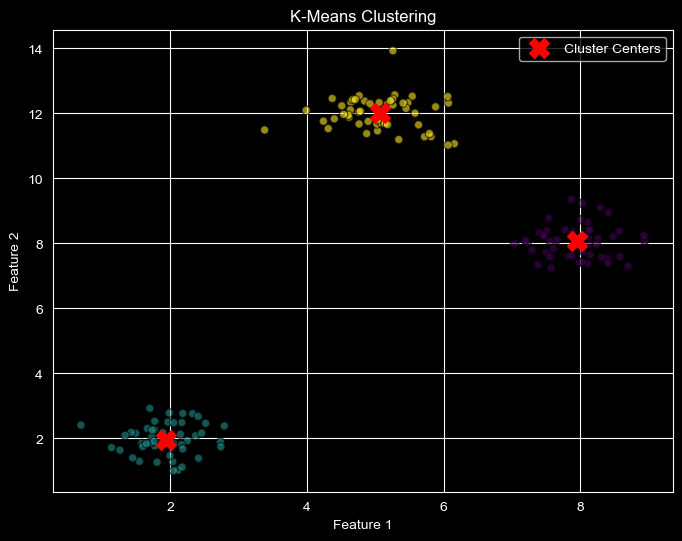

In [13]:
# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Этот код создаёт три случайных группы точек, кластеризует их методом K-средних
и визуализирует результат, окрашивая точки в зависимости от принадлежности к кластеру
и отмечая центры кластеров красными крестами.

Алгоритмы иерархической кластеризации

Иерархическая кластеризация — это метод, который группирует данные,
постепенно объединяя или разъединяя объекты на основе их схожести. В отличие от
метода K-средних, где нужно заранее задавать количество кластеров, иерархические
алгоритмы создают целую иерархию вложенных групп, позволяя исследователю
определить границы кластеров уже после построения модели.

Этот метод особенно полезен, когда структура данных не совсем ясна, и требуется
гибкий подход для выявления естественных групп. Например, в биологии иерархическая
кластеризация помогает строить филогенетические деревья, в маркетинге —
сегментировать аудиторию, а в обработке текстов — находить тематически схожие
документы.

Как это работает

Иерархическая кластеризация бывает двух видов:
- Агломеративная (снизу вверх) — начинается с того, что каждый объект считается
отдельным кластером. Затем алгоритм постепенно объединяет самые похожие группы,
пока не останется один общий кластер.
- Дивизивная (сверху вниз) — стартует с единого кластера, содержащего все объекты, и
рекурсивно разбивает его на более мелкие группы.

На практике агломеративный подход используется чаще, так как он проще в
реализации и интуитивно понятнее.

Процесс агломеративной кластеризации можно представить следующим образом:
1. Каждый объект данных сначала является своим собственным кластером.
2. Вычисляется расстояние между всеми кластерами (обычно используют евклидово
расстояние или косинусное сходство).
3. Два ближайших кластера объединяются в один.
4. Шаг 2 и 3 повторяются до тех пор, пока все объекты не объединятся в единую иерархию.

Результатом работы алгоритма является дендрограмма — древовидная структура,
где ветви показывают, как и в какой последовательности происходило объединение
кластеров. Обрезая дендрограмму на определённом уровне, можно получить желаемое
количество групп.

Пример иерархической кластеризации с кодом

Рассмотрим пример, где мы сгруппируем точки в двумерном пространстве и
визуализируем процесс с помощью дендрограммы.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [4]:
# Генерация случайных данных (три группы)
np.random.seed(42)
group1 = np.random.normal(loc=[2, 2], scale=0.5, size=(10, 2))
group2 = np.random.normal(loc=[6, 6], scale=0.5, size=(10, 2))
group3 = np.random.normal(loc=[10, 2], scale=0.5, size=(10, 2))

In [5]:
#Объединяем данные в единый массив
X = np.vstack([group1, group2, group3])

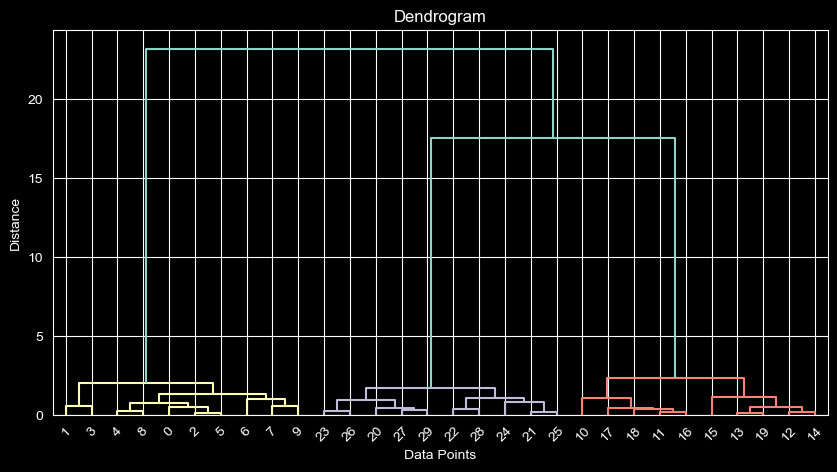

In [6]:
# Строим дендрограмму
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X, method='ward') # Метод Уорда минимизирует внутрикластерную дисперсию
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [7]:
# Применяем агломеративную кластеризацию, задавая 3 кластера
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster_model.fit_predict(X)

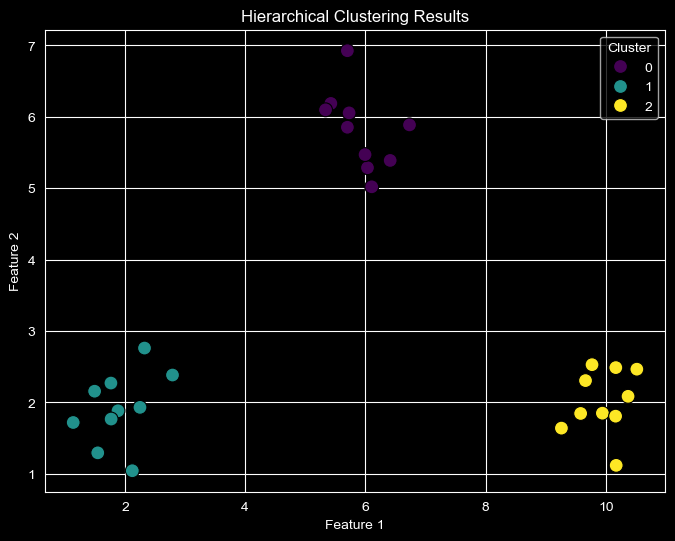

In [8]:
# Визуализация кластеров
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100, edgecolor='k')
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

Разбор кода
1. Создание данных. Мы генерируем три группы точек в двумерном пространстве, каждая
из которых будет соответствовать потенциальному кластеру.
2. Построение дендрограммы. Используем функцию `linkage` из библиотеки SciPy, которая
рассчитывает расстояния между кластерами. Метод `ward` минимизирует
внутрикластерное рассеивание, что часто даёт хорошие результаты. `dendrogram` строит
древовидную структуру, где можно увидеть, как кластеры объединяются.
3. Агломеративная кластеризация. `AgglomerativeClustering(n_clusters=3, linkage='ward')`
выполняет разбиение на три группы. После обучения модели точки получают метки
кластеров.
4. Визуализация результатов. Используем `seaborn.scatterplot`, чтобы раскрасить точки по
кластерам. Цвета соответствуют разным кластерам, а края точек подчёркнуты для
удобства восприятия.

На дендрограмме можно увидеть, как алгоритм сначала объединяет ближайшие
точки, затем группирует более крупные образования, пока все данные не окажутся в одном
кластере. Обрезая дендрограмму на разной высоте, можно выбрать, сколько кластеров
нас устраивает.

На итоговой диаграмме с точками видно, что алгоритм успешно выделил три
естественные группы, каждая из которых соответствует одной из исходных генераций
данных.
Плюсы:
- Не требует заранее задавать число кластеров (можно выбрать после анализа
дендрограммы).
- Хорошо подходит для сложных структур данных.
- Обнаруживает вложенные группы, что полезно для иерархической сегментации.

Минусы:
- Вычислительно затратный при больших наборах данных.
- Менее устойчив к выбросам, чем метод K-средних.
- Полученные кластеры нельзя переструктурировать без повторного запуска алгоритма.

Иерархическая кластеризация — мощный инструмент для анализа данных, который
позволяет обнаруживать скрытые структуры без необходимости заранее задавать число
кластеров. Она особенно полезна, когда важно понять, какие объекты образуют группы на
разных уровнях объединения. Визуализация дендрограммы помогает исследователю
оценить структуру данных и выбрать оптимальное количество кластеров, делая этот метод
гибким и удобным для аналитики.